In [1]:
import pandas as pd 
import numpy as np
from tabulate import tabulate 

# Load CSV file
df = pd.read_csv('hospitals.csv')
# Display the first few rows
print(df.head())

def clean_data(df):
    # Rename column 'PARISH,C,25' to 'Parish'
    df = df.rename(columns={'PARISH,C,25': 'Parish'})
    # Rename column 'HEALTH_ARE,C,16' to 'Health_region'
    df = df.rename(columns={'HEALTH_ARE,C,16': 'Health_region'})
    # Rename column 'FACIL_TYPE,C,40' to 'Facility_type'
    df = df.rename(columns={'FACIL_TYPE,C,40': 'Facility_type'})
    # Rename column 'CEN_NAME,C,50' to 'Facility_name'
    df = df.rename(columns={'CEN_NAME,C,50': 'Facility_name'})
    # Rename column 'CEN_CODE,C,8' to 'Facility_code'
    df = df.rename(columns={'CEN_CODE,C,8': 'Facility_code'})
    # Rename column 'ADDRESS,C,80' to 'Address'
    df = df.rename(columns={'ADDRESS,C,80': 'Address'})
    # Rename column 'TELEPHONE,C,10' to 'Telephone'
    df = df.rename(columns={'TELEPHONE,C,10': 'Telephone'})
    # Rename column 'FACIL_STAT,C,16' to 'Facility_status'
    df = df.rename(columns={'FACIL_STAT,C,16': 'Facility_status'})
    # Rename column 'OWNERSHIP,C,16' to 'Ownership'
    df = df.rename(columns={'OWNERSHIP,C,16': 'Ownership'})
    # Rename column 'Z990__BEDS,N,10,0' to 'Z990_Beds'
    df = df.rename(columns={'Z990__BEDS,N,10,0': 'Z990_Beds'})
    # Rename column 'Z996__BEDS,N,10,0' to 'Z996_Beds'
    df = df.rename(columns={'Z996__BEDS,N,10,0': 'Z996_Beds'})
    # Rename column 'Z999__BEDS,N,10,0' to 'Z999_Beds'
    df = df.rename(columns={'Z999__BEDS,N,10,0': 'Z999_Beds'})
    return df

df_clean = clean_data(df.copy())
df_clean.head()

# While viewing the data, we notice that the Facility_code column is being read as a date type, which may lead to issues if there are leading zeros in the codes. To ensure that the Facility_code is treated as a string, we can specify the data type when reading the CSV file.
df_clean = df_clean.astype({"Facility_code": str})

print(df_clean[df_clean["Ownership"] == "Private"][["Facility_code", "Ownership"]])

# Create mask for string "nan" AND actual NaN, only for Private ownership, this is needed to identify rows that require new Facility_code values.
mask = ((df_clean["Facility_code"] == "nan") | (df_clean["Facility_code"].isna())) & (df_clean["Ownership"] == "Private")

# Generate and assign codes using the format "PRIV01", "PRIV02", etc., for the rows that match the mask. The zfill(2) method ensures that the numbers are zero-padded to two digits.
codes = [f"PRIV{str(i+1).zfill(2)}" for i in range(mask.sum())]
df_clean.loc[mask, "Facility_code"] = codes

# Verify the result
print(df_clean[df_clean["Ownership"] == "Private"][["Facility_code", "Ownership"]])

# A run of the tabular view inorder to confirm that the nan Facility_code values have been filled with the new PRIV codes.
print(tabulate(df_clean, headers = 'keys', tablefmt = 'github'))

               PARISH,C,25   HEALTH_ARE,C,16             FACIL_TYPE,C,40  \
0  Kingston and St. Andrew  SE Health Region  Type S Specialist Hospital   
1  Kingston and St. Andrew  SE Health Region  Type S Specialist Hospital   
2  Kingston and St. Andrew  SE Health Region  Type S Specialist Hospital   
3  Kingston and St. Andrew  SE Health Region             Type A Hospital   
4  Kingston and St. Andrew  SE Health Region             Type A Hospital   

      CEN_NAME,C,50 CEN_CODE,C,8                 ADDRESS,C,80 TELEPHONE,C,10  \
0  Victoria Jubilee        01-24           North Street, Kgn.       922-1700   
1    National Chest        01-23  36 1/2 Barbican Rd., Kgn. 6       977-7071   
2        Bustamante        01-20      Arthur Wint Dr., Kgn. 5       926-5721   
3   Kingston Public        01-02           North Street, Kgn.       922-0227   
4        University        01-03                         Mona       927-1620   

  FACIL_STAT,C,16 OWNERSHIP,C,16  Z990__BEDS,N,10,0  Z996__BED

In [2]:
df = pd.read_csv('hospitals.csv')
# Display the first few rows
print(df.head())

               PARISH,C,25   HEALTH_ARE,C,16             FACIL_TYPE,C,40  \
0  Kingston and St. Andrew  SE Health Region  Type S Specialist Hospital   
1  Kingston and St. Andrew  SE Health Region  Type S Specialist Hospital   
2  Kingston and St. Andrew  SE Health Region  Type S Specialist Hospital   
3  Kingston and St. Andrew  SE Health Region             Type A Hospital   
4  Kingston and St. Andrew  SE Health Region             Type A Hospital   

      CEN_NAME,C,50 CEN_CODE,C,8                 ADDRESS,C,80 TELEPHONE,C,10  \
0  Victoria Jubilee        01-24           North Street, Kgn.       922-1700   
1    National Chest        01-23  36 1/2 Barbican Rd., Kgn. 6       977-7071   
2        Bustamante        01-20      Arthur Wint Dr., Kgn. 5       926-5721   
3   Kingston Public        01-02           North Street, Kgn.       922-0227   
4        University        01-03                         Mona       927-1620   

  FACIL_STAT,C,16 OWNERSHIP,C,16  Z990__BEDS,N,10,0  Z996__BED

In [3]:
def clean_data(df):
    # Rename column 'PARISH,C,25' to 'Parish'
    df = df.rename(columns={'PARISH,C,25': 'Parish'})
    # Rename column 'HEALTH_ARE,C,16' to 'Health_region'
    df = df.rename(columns={'HEALTH_ARE,C,16': 'Health_region'})
    # Rename column 'FACIL_TYPE,C,40' to 'Facility_type'
    df = df.rename(columns={'FACIL_TYPE,C,40': 'Facility_type'})
    # Rename column 'CEN_NAME,C,50' to 'Facility_name'
    df = df.rename(columns={'CEN_NAME,C,50': 'Facility_name'})
    # Rename column 'CEN_CODE,C,8' to 'Facility_code'
    df = df.rename(columns={'CEN_CODE,C,8': 'Facility_code'})
    # Rename column 'ADDRESS,C,80' to 'Address'
    df = df.rename(columns={'ADDRESS,C,80': 'Address'})
    # Rename column 'TELEPHONE,C,10' to 'Telephone'
    df = df.rename(columns={'TELEPHONE,C,10': 'Telephone'})
    # Rename column 'FACIL_STAT,C,16' to 'Facility_status'
    df = df.rename(columns={'FACIL_STAT,C,16': 'Facility_status'})
    # Rename column 'OWNERSHIP,C,16' to 'Ownership'
    df = df.rename(columns={'OWNERSHIP,C,16': 'Ownership'})
    # Rename column 'Z990__BEDS,N,10,0' to 'Z990_Beds'
    df = df.rename(columns={'Z990__BEDS,N,10,0': 'Z990_Beds'})
    # Rename column 'Z996__BEDS,N,10,0' to 'Z996_Beds'
    df = df.rename(columns={'Z996__BEDS,N,10,0': 'Z996_Beds'})
    # Rename column 'Z999__BEDS,N,10,0' to 'Z999_Beds'
    df = df.rename(columns={'Z999__BEDS,N,10,0': 'Z999_Beds'})
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Parish,Health_region,Facility_type,Facility_name,Facility_code,Address,Telephone,Facility_status,Ownership,Z990_Beds,Z996_Beds,Z999_Beds
0,Kingston and St. Andrew,SE Health Region,Type S Specialist Hospital,Victoria Jubilee,01-24,"North Street, Kgn.",922-1700,Open,Public,215,176,177
1,Kingston and St. Andrew,SE Health Region,Type S Specialist Hospital,National Chest,01-23,"36 1/2 Barbican Rd., Kgn. 6",977-7071,Open,Private,73,100,100
2,Kingston and St. Andrew,SE Health Region,Type S Specialist Hospital,Bustamante,01-20,"Arthur Wint Dr., Kgn. 5",926-5721,Open,Public,244,253,253
3,Kingston and St. Andrew,SE Health Region,Type A Hospital,Kingston Public,01-02,"North Street, Kgn.",922-0227,Open,Public,442,360,399
4,Kingston and St. Andrew,SE Health Region,Type A Hospital,University,01-03,Mona,927-1620,Open,Quasi Public,0,0,0


In [ ]:
# While viewing the data, we notice that the Facility_code column is being read as a date type, which may lead to issues if there are leading zeros in the codes. To ensure that the Facility_code is treated as a string, we can specify the data type when reading the CSV file.
df_clean = df_clean.astype({"Facility_code": str})

In [5]:
# After converting Facility_code to string, we can check for any "nan" string values that may have been read in as a result of the conversion. This is important to identify rows that require new Facility_code values.
print(df_clean[df_clean["Ownership"] == "Private"][["Facility_code", "Ownership"]])

   Facility_code Ownership
1          01-23   Private
8            nan   Private
9            nan   Private
10           nan   Private
11           nan   Private
12           nan   Private
20           nan   Private
21           nan   Private
22           nan   Private
25           nan   Private
28           nan   Private


In [6]:
# Create mask for string "nan" AND actual NaN, only for Private ownership, this is needed to identify rows that require new Facility_code values.
mask = ((df_clean["Facility_code"] == "nan") | (df_clean["Facility_code"].isna())) & (df_clean["Ownership"] == "Private")

In [7]:
# Generate and assign codes using the format "PRIV01", "PRIV02", etc., for the rows that match the mask. The zfill(2) method ensures that the numbers are zero-padded to two digits.
codes = [f"PRIV{str(i+1).zfill(2)}" for i in range(mask.sum())]
df_clean.loc[mask, "Facility_code"] = codes

In [8]:
# Verify the result
print(df_clean[df_clean["Ownership"] == "Private"][["Facility_code", "Ownership"]])

   Facility_code Ownership
1          01-23   Private
8         PRIV01   Private
9         PRIV02   Private
10        PRIV03   Private
11        PRIV04   Private
12        PRIV05   Private
20        PRIV06   Private
21        PRIV07   Private
22        PRIV08   Private
25        PRIV09   Private
28        PRIV10   Private


In [9]:
# A run of the tabular view inorder to confirm that the nan Facility_code values have been filled with the new PRIV codes.
print(tabulate(df_clean, headers = 'keys', tablefmt = 'github'))

|    | Parish                  | Health_region    | Facility_type              | Facility_name       | Facility_code   | Address                                     | Telephone   | Facility_status   | Ownership    |   Z990_Beds |   Z996_Beds |   Z999_Beds |
|----|-------------------------|------------------|----------------------------|---------------------|-----------------|---------------------------------------------|-------------|-------------------|--------------|-------------|-------------|-------------|
|  0 | Kingston and St. Andrew | SE Health Region | Type S Specialist Hospital | Victoria Jubilee    | 01-24           | North Street, Kgn.                          | 922-1700    | Open              | Public       |         215 |         176 |         177 |
|  1 | Kingston and St. Andrew | SE Health Region | Type S Specialist Hospital | National Chest      | 01-23           | 36 1/2 Barbican Rd., Kgn. 6                 | 977-7071    | Open              | Private      |          7

In [10]:
#This aspect of the code is for the EDA notebook, which is used to explore the cleaned data and gain insights from it. The code includes importing necessary libraries, checking the structure of the DataFrame, and generating descriptive statistics to understand the distribution of the data.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_clean.info()
df_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Parish           35 non-null     object
 1   Health_region    35 non-null     object
 2   Facility_type    35 non-null     object
 3   Facility_name    35 non-null     object
 4   Facility_code    35 non-null     object
 5   Address          35 non-null     object
 6   Telephone        34 non-null     object
 7   Facility_status  35 non-null     object
 8   Ownership        35 non-null     object
 9   Z990_Beds        35 non-null     int64 
 10  Z996_Beds        35 non-null     int64 
 11  Z999_Beds        35 non-null     int64 
dtypes: int64(3), object(9)
memory usage: 3.4+ KB


,Z990_Beds,Z996_Beds,Z999_Beds
count,35.000000,35.000000,35.000000
mean,132.628571,118.542857,124.371429
std,274.356797,210.572936,211.529178
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,70.000000,62.000000,75.000000
75%,128.000000,132.500000,147.000000
max,1600.000000,1190.000000,1190.000000


Ownership
Public          23
Private         11
Quasi Public     1
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Facility Types')

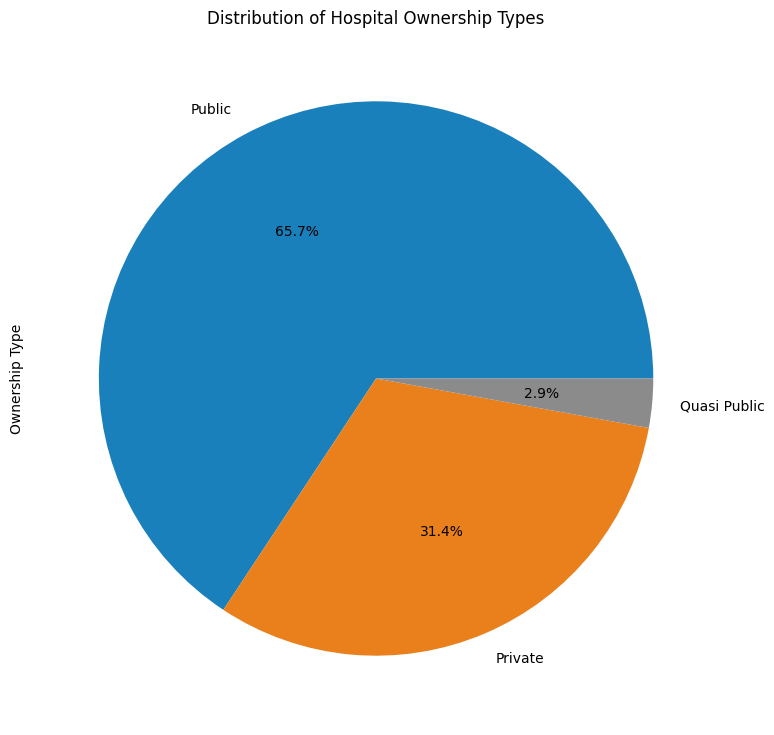

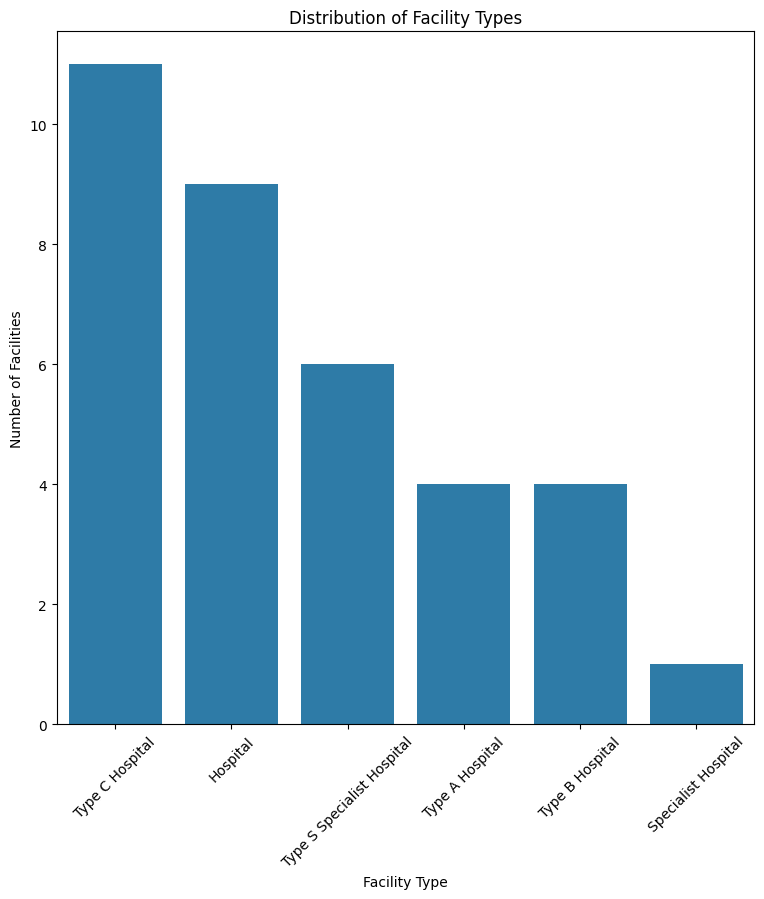

In [11]:
# To visualize the distribution of hospital ownership types, we can create a pie chart using the value counts of the "Ownership" column. This will help us understand the proportion of different ownership types in the dataset.
ownership_counts = df_clean["Ownership"].value_counts()
print(ownership_counts)

ownership_counts.plot.pie(autopct='%1.1f%%', figsize=(9,9), ylabel='Ownership Type', colors=['#1a80bb', '#ea801c', '#8b8b8b'],title='Distribution of Hospital Ownership Types')

plt.figure(figsize=(9,9))
sns.countplot(data=df_clean, x="Facility_type", order=df_clean['Facility_type'].value_counts().index, color='#1a80bb')
plt.xticks(rotation=45)
plt.xlabel('Facility Type')
plt.ylabel('Number of Facilities')
plt.title('Distribution of Facility Types')

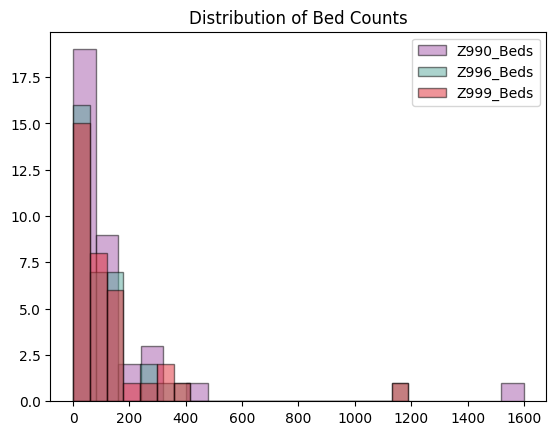

In [ ]:
# To visualize the distribution of bed counts across different categories (Z990_Beds, Z996_Beds, Z999_Beds), we can create histograms for each category. This will help us understand the distribution and frequency of bed counts in the dataset.
plt.hist(df_clean["Z990_Beds"], color= '#a559aa',bins=20, edgecolor='black', alpha=0.5, label='Z990_Beds')
plt.hist(df_clean["Z996_Beds"], color= '#59a89c', bins=20, edgecolor='black', alpha=0.5, label='Z996_Beds')
plt.hist(df_clean["Z999_Beds"], color= '#e02b35', bins=20, edgecolor='black', alpha=0.5, label='Z999_Beds')
plt.title('Distribution of Bed Counts')
plt.legend()

C:\Users\Javaughn\AppData\Local\Temp\ipykernel_22196\3510002044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="Ownership", y="Z999_Beds", palette=['#1a80bb', '#ea801c', '#8b8b8b'])


Text(0.5, 1.0, 'Beds by Ownership (Individual Facilities)')

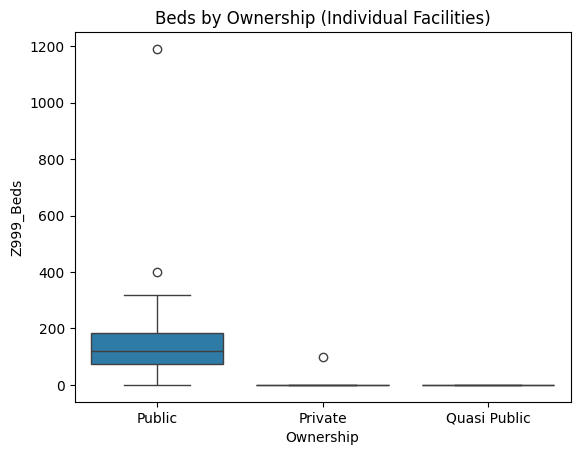

In [18]:
# To visualize the relationship between ownership types and bed counts, we can create box plots for each bed category (Z990_Beds, Z996_Beds, Z999_Beds) grouped by ownership. This will help us understand how bed counts vary across different ownership types.
sns.boxplot(data=df_clean, x="Ownership", y="Z999_Beds", palette=['#1a80bb', '#ea801c', '#8b8b8b'])
plt.title("Beds by Ownership (Individual Facilities)")


C:\Users\Javaughn\AppData\Local\Temp\ipykernel_22196\4234718958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="Ownership", y="Z996_Beds", palette=['#1a80bb', '#ea801c', '#8b8b8b'])


Text(0.5, 1.0, 'Beds by Ownership (Individual Facilities)')

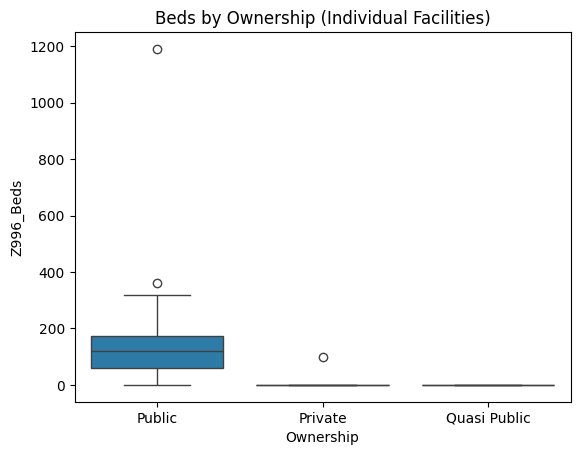

In [19]:
# To visualize the relationship between ownership types and bed counts, we can create box plots for each bed category (Z990_Beds, Z996_Beds, Z999_Beds) grouped by ownership. This will help us understand how bed counts vary across different ownership types.
sns.boxplot(data=df_clean, x="Ownership", y="Z996_Beds", palette=['#1a80bb', '#ea801c', '#8b8b8b'])
plt.title("Beds by Ownership (Individual Facilities)")

C:\Users\Javaughn\AppData\Local\Temp\ipykernel_22196\2127727692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="Ownership", y="Z990_Beds", palette=['#1a80bb', '#ea801c', '#8b8b8b'])


Text(0.5, 1.0, 'Beds by Ownership (Individual Facilities)')

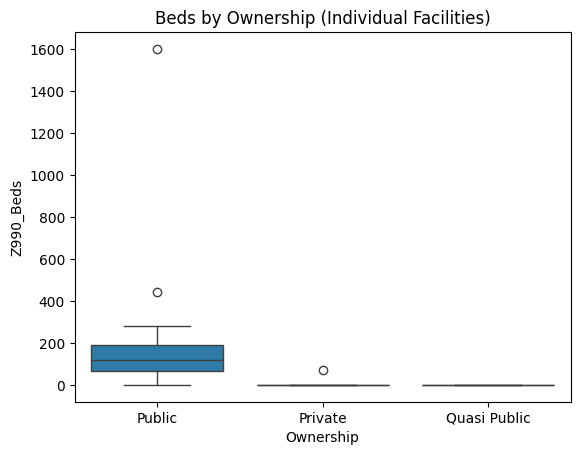

In [20]:
# To visualize the relationship between ownership types and bed counts, we can create box plots for each bed category (Z990_Beds, Z996_Beds, Z999_Beds) grouped by ownership. This will help us understand how bed counts vary across different ownership types.
sns.boxplot(data=df_clean, x="Ownership", y="Z990_Beds", palette=['#1a80bb', '#ea801c', '#8b8b8b'])
plt.title("Beds by Ownership (Individual Facilities)")

                     Parish  Z990_Beds  Z996_Beds  Z999_Beds
0                 Clarendon        130        129        146
1                   Hanover         51         52         57
2   Kingston and St. Andrew       2716       2124       2234
3                Manchester        285        288        275
4                  Portland        125        125        165
5                   St. Ann        150        140        139
6             St. Catherine        332        333        352
7             St. Elizabeth        121        101         97
8                 St. James        242        320        317
9                  St. Mary        204        209        195
10               St. Thomas         52         98         98
11                 Trelawny        103         62         89
12             Westmoreland        131        168        189


Text(0, 0.5, 'Total Beds')

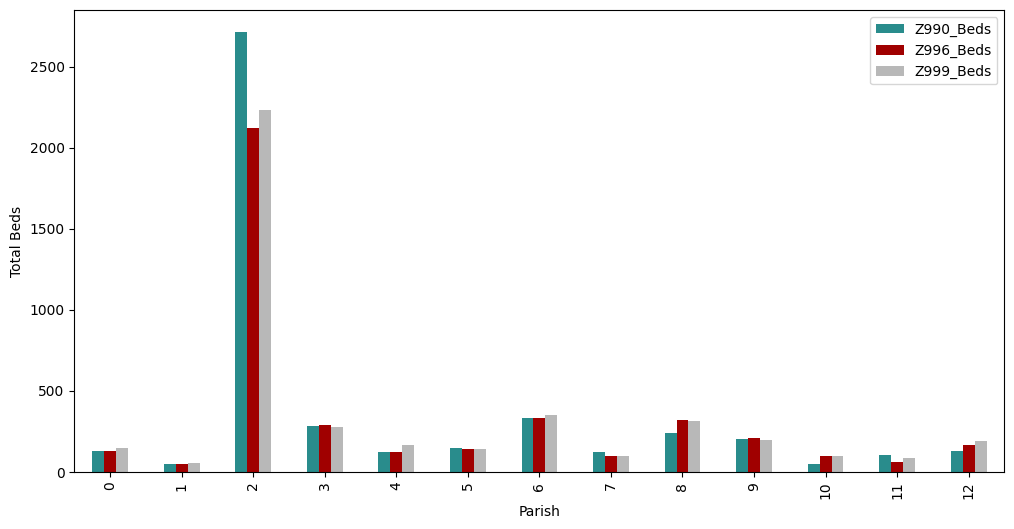

In [21]:
# To visualize the total number of beds available in each parish, we can create a bar chart that sums the bed counts (Z990_Beds, Z996_Beds, Z999_Beds) for each parish. This will help us understand the distribution of beds across different parishes.
beds_per_parish = df_clean.groupby("Parish")[["Z990_Beds", "Z996_Beds", "Z999_Beds", ]].sum().reset_index()
print(beds_per_parish)
beds_per_parish.plot.bar(figsize=(12,6), color=['#298c8c', '#a00000', '#b8b8b8'])
plt.xlabel("Parish")
plt.ylabel("Total Beds")


                     Z990_Beds  Z996_Beds  Z999_Beds
Facility_name                                       
Bellevue                  1600       1190       1190
Kingston Public            442        360        399
Spanish Town               282        280        300
Bustamante                 244        253        253
Cornwall Regional          242        320        317
Victoria Jubilee           215        176        177
Mandeville                 163        168        155
St. Anns Bay               150        140        139
Sav-la-mar                 131        168        189
Port Antonio               125        125        165
Percy Junor                122        120        120
Black River                121        101         97
Annotto Bay                117        120        120
Falmouth                   103         62         89
Mona Rehabilitation         90          0         71
Port Maria                  87         89         75
National Chest              73        100     

<Axes: title={'center': 'Total Beds by Facility'}, xlabel='Facility_name'>

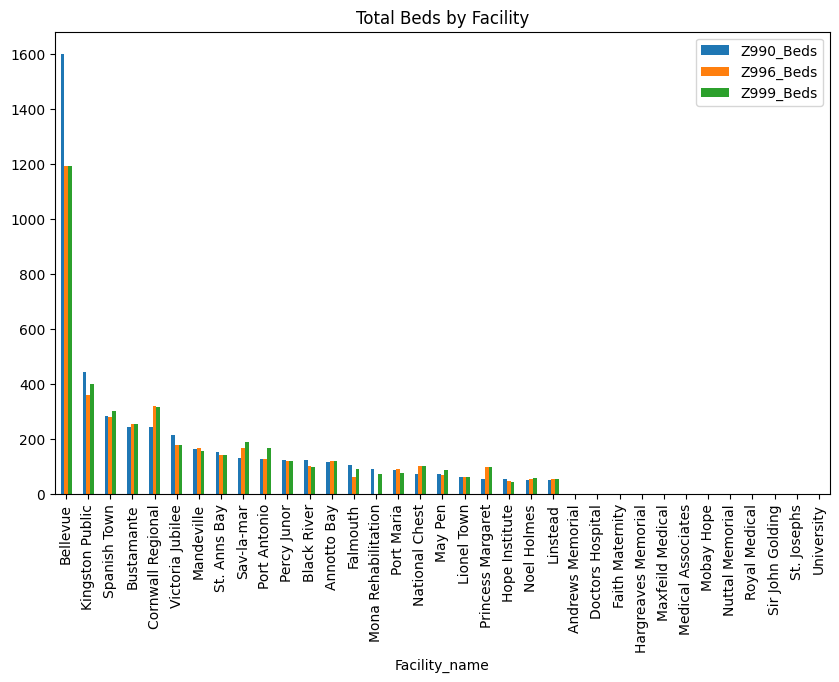

In [22]:
# To visualize the total number of beds available in each facility, we can create a bar chart that sums the bed counts (Z990_Beds, Z996_Beds, Z999_Beds) for each facility. This will help us understand the distribution of beds across different facilities.
facility_beds = df_clean.groupby("Facility_name")[["Z990_Beds", "Z996_Beds", "Z999_Beds"]].sum().sort_values(by=["Z990_Beds", "Z996_Beds", "Z999_Beds"], ascending=False)
print(facility_beds)
facility_beds.plot(kind='bar', figsize=(10,6), title='Total Beds by Facility')

In [19]:
import pandas as pd 
import numpy as np

n_days=120
facility_ids = ["01-24", "01-23", "01-20", "01-02", "01-03", "01-21", "01-19", "PRIV01", "PRIV02", "PRIV03", "PRIV04", "PRIV05", "03-18", "04-16", "05-08", "05-17", "06-05", "07-10", "08-01", "PRIV06", "PRIV07", "PRIV08", "13-12", "14-07", "14-11", "01-22"]
departments = ["ER", "ICU", "Maternity"]

seasonal_factors = {
    "Jan": 1.0, 
    "Feb": 1.3, #30% increase in February due to the flu
    "Mar": 1.2, #20% increase in March due to the tail end of flu season
    "Apr": 0.9, #10% decrease in April as flu season ends
}

records = []

date_range = pd.date_range(start="2026-01-01", periods=n_days)

for date in date_range:
    month = date.strftime("%b")
    season_factor = seasonal_factors.get(month,1.0)
     
    for facility in facility_ids:
       for dept in departments:
         
        if dept == "ER":
           lam = 20 
        elif dept == "ICU":
           lam = 10
        else: # Maternity
           lam = 5 

        arrivals = np.random.poisson(lam * season_factor)

        records.append({
           "Date": date, 
           "Facility_ID": facility,
           "Departments": dept,
           "Predicted_Arrivals": arrivals,
           })


synthetic_df = pd.DataFrame(records)
print(synthetic_df)

synthetic_df.to_csv("synthetic_hospital_arrivals.csv", index=False)

           Date Facility_ID Departments  Predicted_Arrivals
0    2026-01-01       01-24          ER                  25
1    2026-01-01       01-24         ICU                   8
2    2026-01-01       01-24   Maternity                   5
3    2026-01-01       01-23          ER                  23
4    2026-01-01       01-23         ICU                  13
...         ...         ...         ...                 ...
9355 2026-04-30       14-11         ICU                  13
9356 2026-04-30       14-11   Maternity                   2
9357 2026-04-30       01-22          ER                  14
9358 2026-04-30       01-22         ICU                  10
9359 2026-04-30       01-22   Maternity                   5

[9360 rows x 4 columns]


In [20]:
merge_df = pd.merge(df_clean, synthetic_df, left_on="Facility_code", right_on="Facility_ID", how="inner")

In [21]:
print(merge_df)

                       Parish     Health_region               Facility_type  \
0     Kingston and St. Andrew  SE Health Region  Type S Specialist Hospital   
1     Kingston and St. Andrew  SE Health Region  Type S Specialist Hospital   
2     Kingston and St. Andrew  SE Health Region  Type S Specialist Hospital   
3     Kingston and St. Andrew  SE Health Region  Type S Specialist Hospital   
4     Kingston and St. Andrew  SE Health Region  Type S Specialist Hospital   
...                       ...               ...                         ...   
9355  Kingston and St. Andrew  SE Health Region             Type A Hospital   
9356  Kingston and St. Andrew  SE Health Region             Type A Hospital   
9357  Kingston and St. Andrew  SE Health Region             Type A Hospital   
9358  Kingston and St. Andrew  SE Health Region             Type A Hospital   
9359  Kingston and St. Andrew  SE Health Region             Type A Hospital   

            Facility_name Facility_code            

C:\Users\Javaughn\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
21:25:27 - cmdstanpy - INFO - Chain [1] start processing
21:25:27 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


21:25:28 - cmdstanpy - INFO - Chain [1] start processing
21:25:28 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


21:25:29 - cmdstanpy - INFO - Chain [1] start processing
21:25:29 - cmdstanpy - INFO - Chain [1] done processing
21:25:29 - cmdstanpy - INFO - Chain [1] start processing


Figure(1000x600)


21:25:29 - cmdstanpy - INFO - Chain [1] done processing
21:25:30 - cmdstanpy - INFO - Chain [1] start processing


Figure(1000x600)


21:25:30 - cmdstanpy - INFO - Chain [1] done processing
21:25:30 - cmdstanpy - INFO - Chain [1] start processing


Figure(1000x600)


21:25:30 - cmdstanpy - INFO - Chain [1] done processing
21:25:31 - cmdstanpy - INFO - Chain [1] start processing


Figure(1000x600)


21:25:31 - cmdstanpy - INFO - Chain [1] done processing
21:25:31 - cmdstanpy - INFO - Chain [1] start processing


Figure(1000x600)


21:25:31 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


21:25:32 - cmdstanpy - INFO - Chain [1] start processing
21:25:32 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


21:25:32 - cmdstanpy - INFO - Chain [1] start processing
21:25:32 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


21:25:33 - cmdstanpy - INFO - Chain [1] start processing
21:25:33 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


21:25:34 - cmdstanpy - INFO - Chain [1] start processing
21:25:34 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


21:25:34 - cmdstanpy - INFO - Chain [1] start processing
21:25:34 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


21:25:35 - cmdstanpy - INFO - Chain [1] start processing
21:25:35 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


21:25:36 - cmdstanpy - INFO - Chain [1] start processing
21:25:36 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


21:25:37 - cmdstanpy - INFO - Chain [1] start processing
21:25:37 - cmdstanpy - INFO - Chain [1] done processing
21:25:37 - cmdstanpy - INFO - Chain [1] start processing


Figure(1000x600)


21:25:38 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


21:25:38 - cmdstanpy - INFO - Chain [1] start processing
21:25:38 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


21:25:39 - cmdstanpy - INFO - Chain [1] start processing
21:25:39 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


21:25:39 - cmdstanpy - INFO - Chain [1] start processing
21:25:39 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


21:25:40 - cmdstanpy - INFO - Chain [1] start processing
21:25:40 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Javaughn\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(facecolor='w', figsize=figsize)
21:25:41 - cmdstanpy - INFO - Chain [1] start processing


Figure(1000x600)


21:25:41 - cmdstanpy - INFO - Chain [1] done processing
21:25:41 - cmdstanpy - INFO - Chain [1] start processing


Figure(1000x600)


21:25:41 - cmdstanpy - INFO - Chain [1] done processing
21:25:41 - cmdstanpy - INFO - Chain [1] start processing


Figure(1000x600)


21:25:41 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


21:25:42 - cmdstanpy - INFO - Chain [1] start processing
21:25:42 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


21:25:43 - cmdstanpy - INFO - Chain [1] start processing
21:25:43 - cmdstanpy - INFO - Chain [1] done processing


Figure(1000x600)


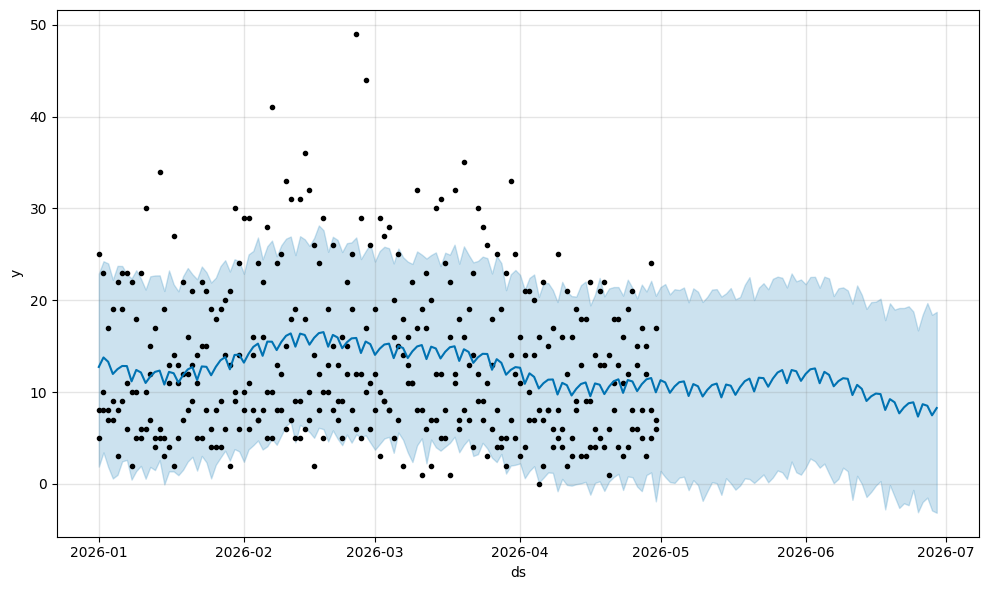

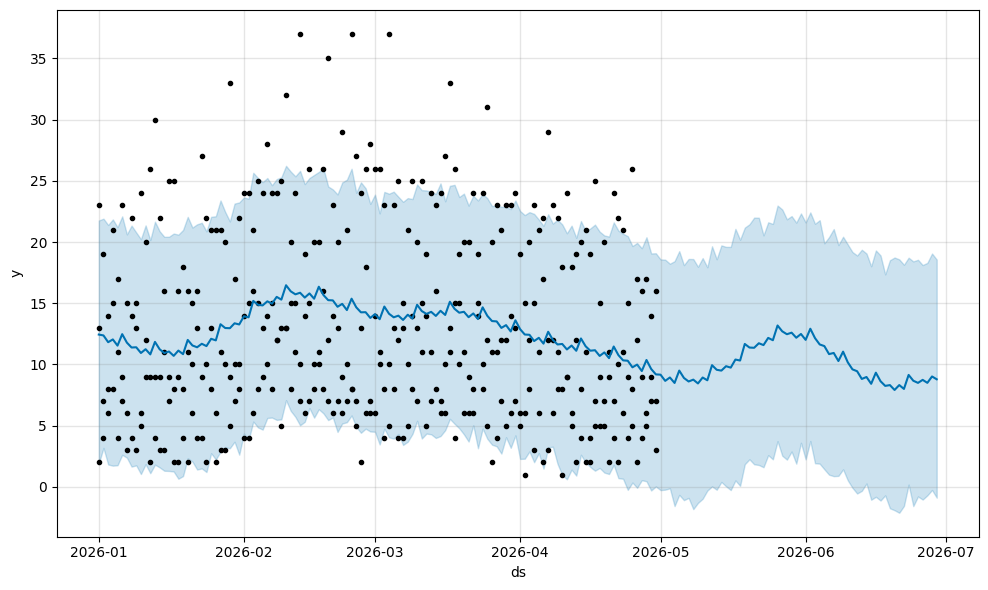

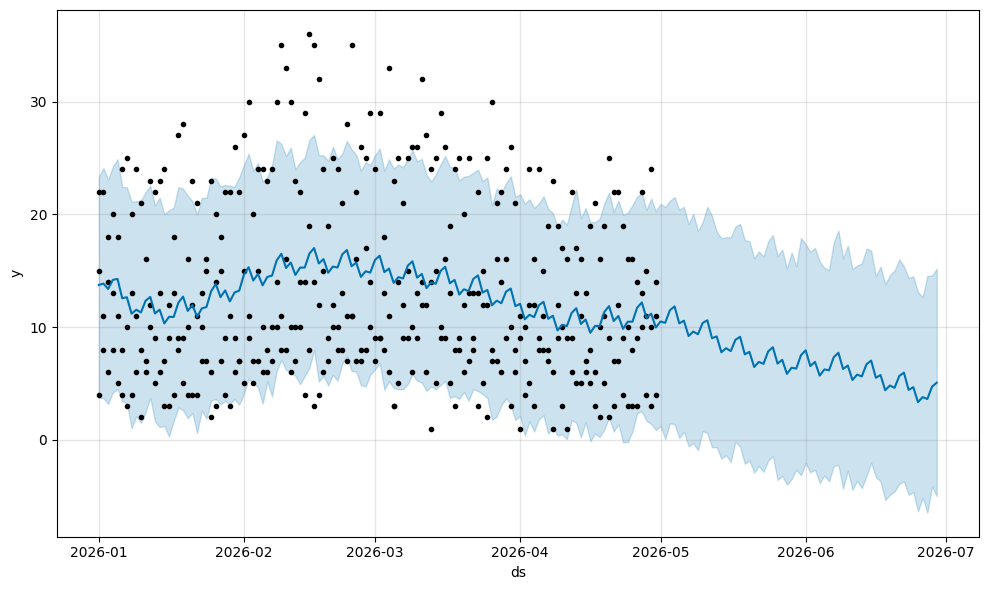

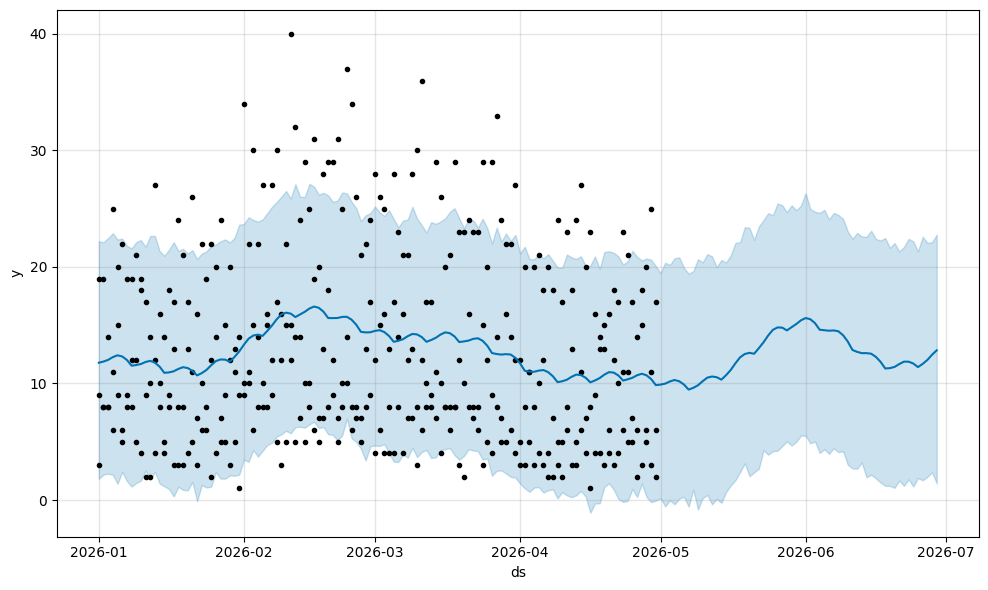

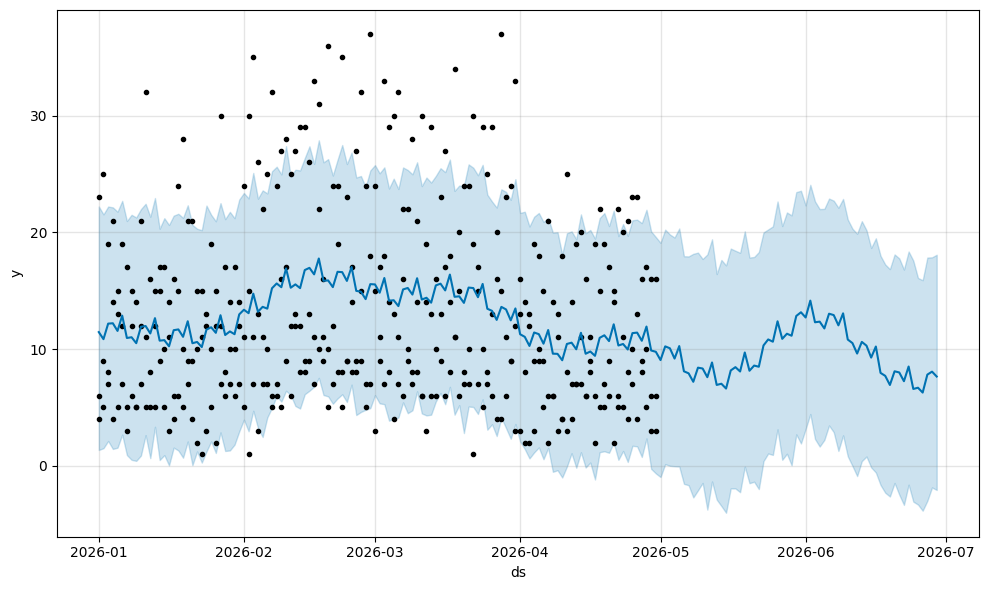

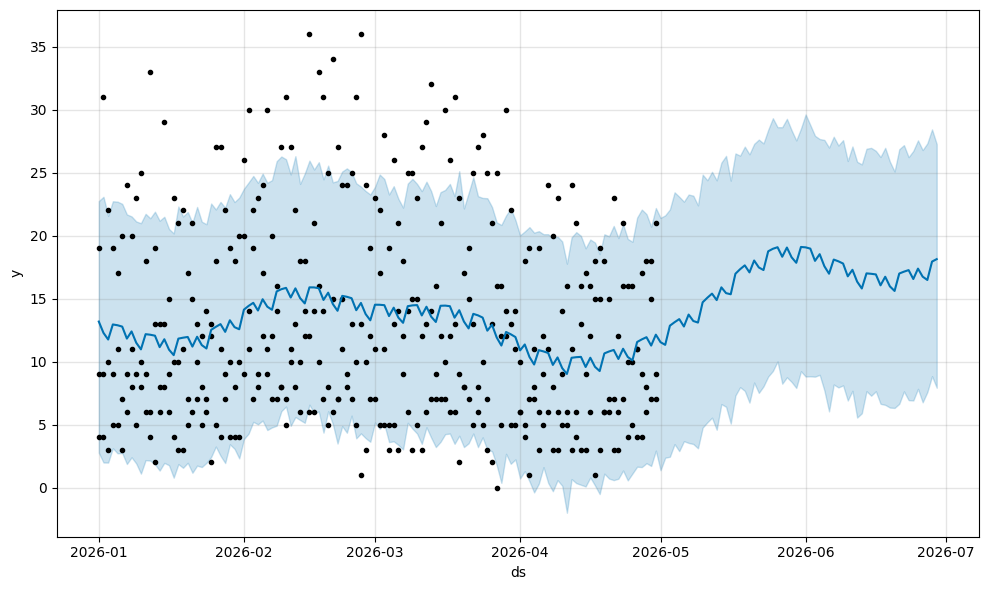

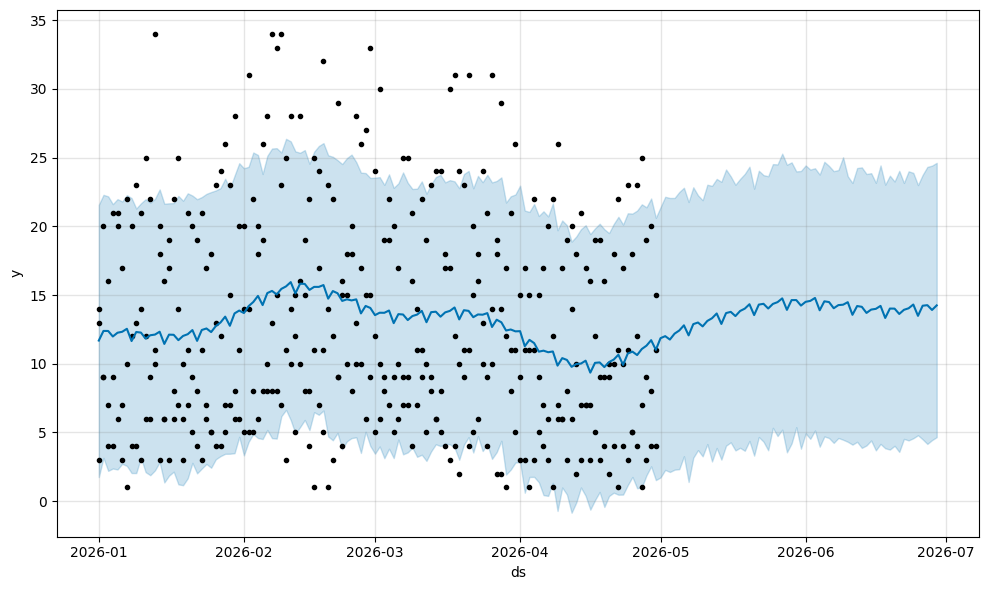

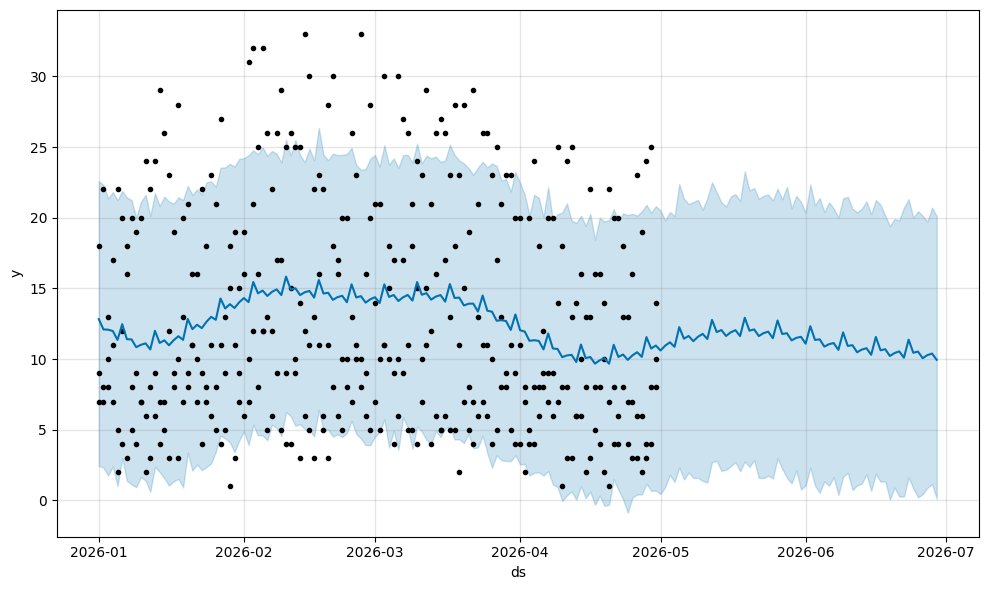

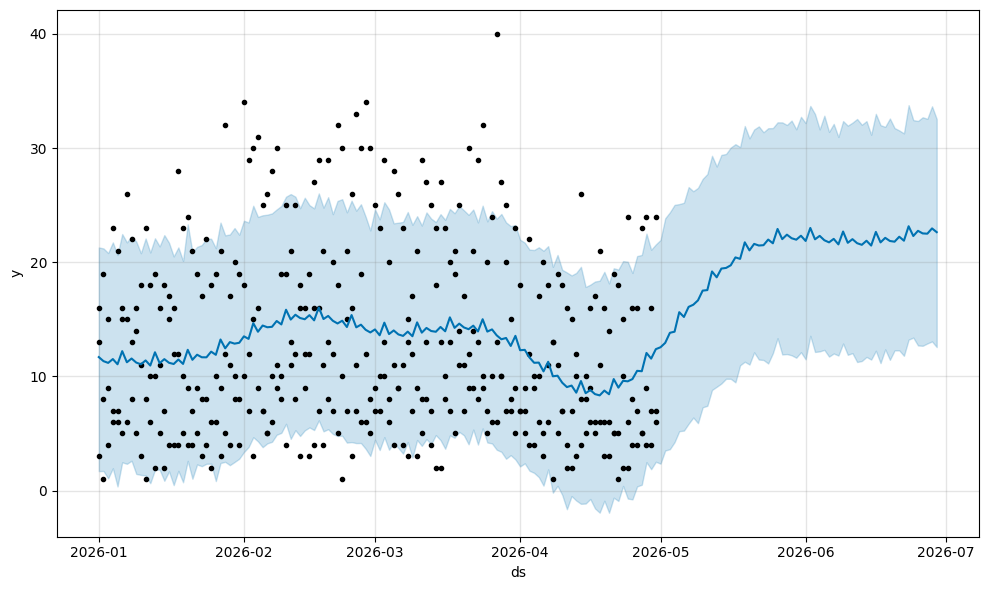

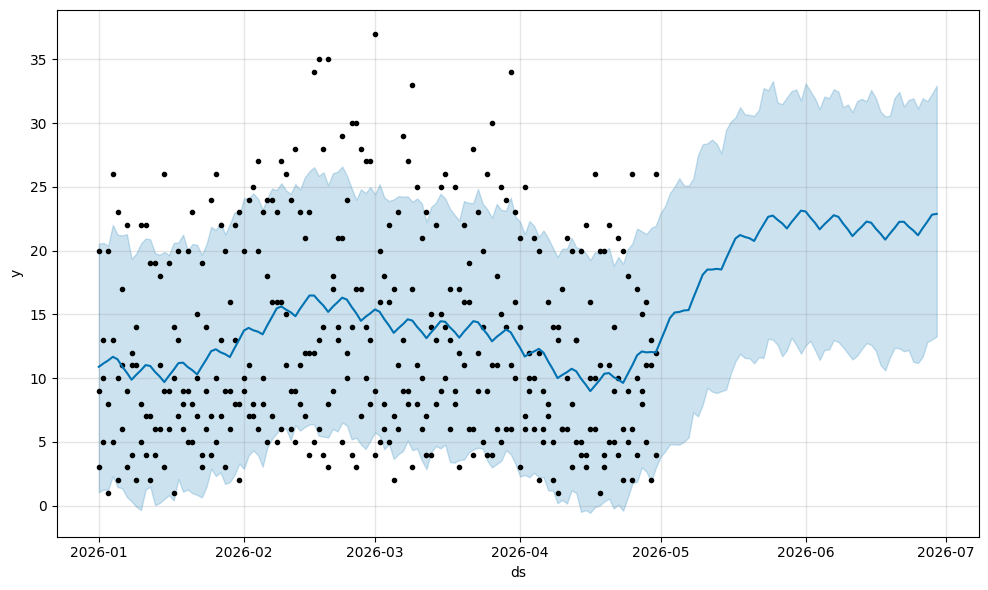

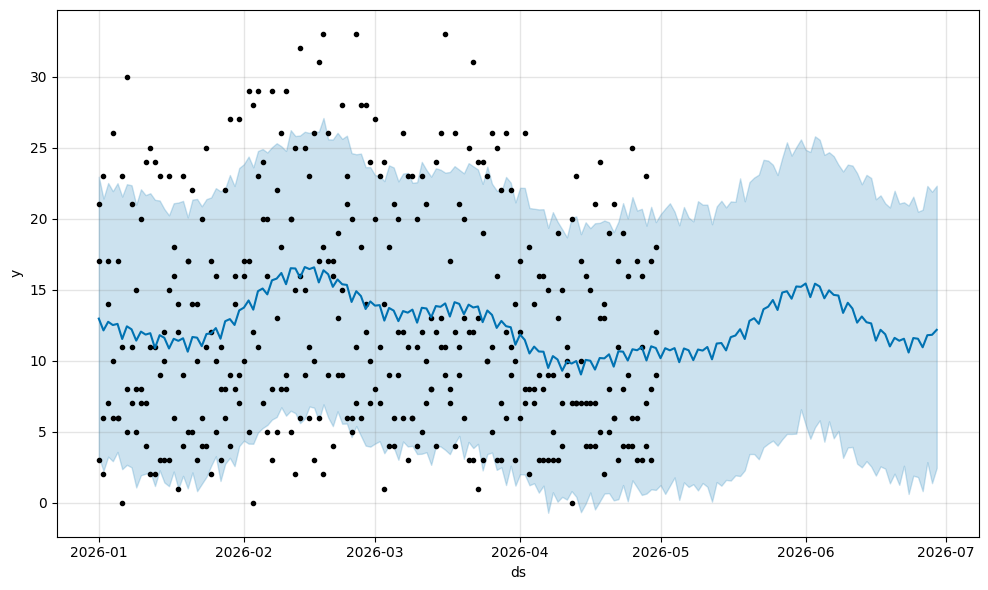

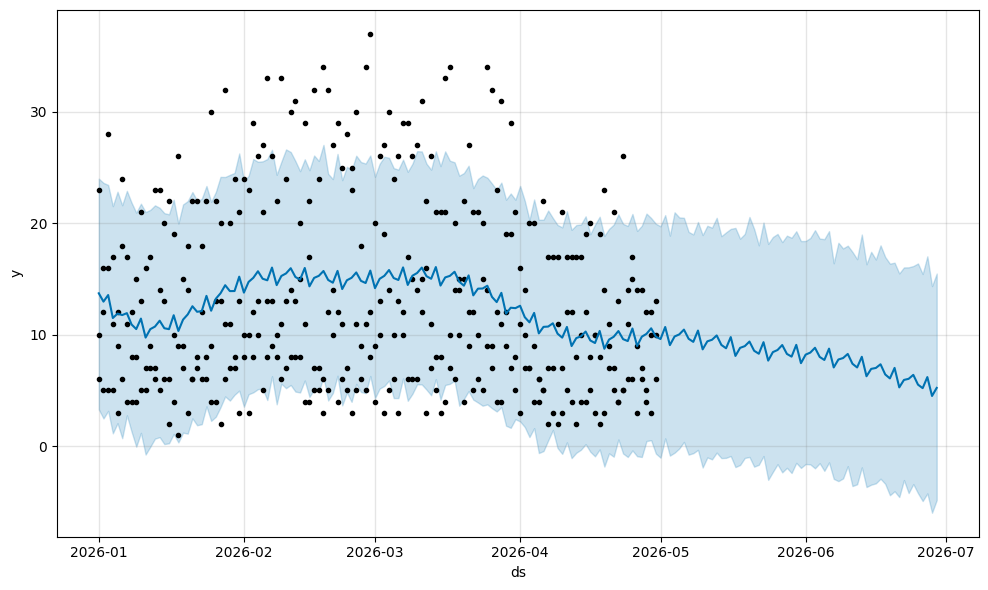

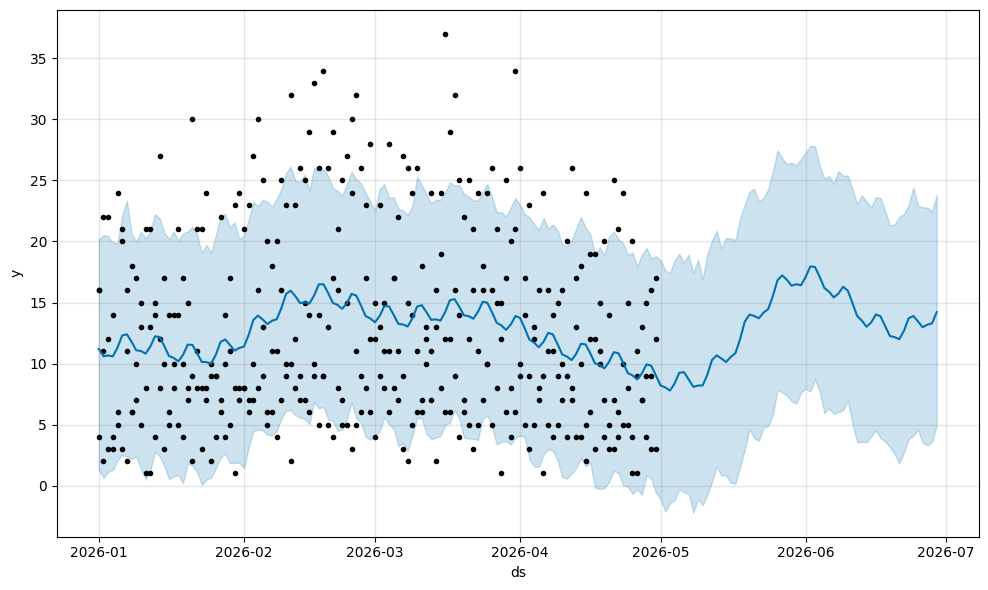

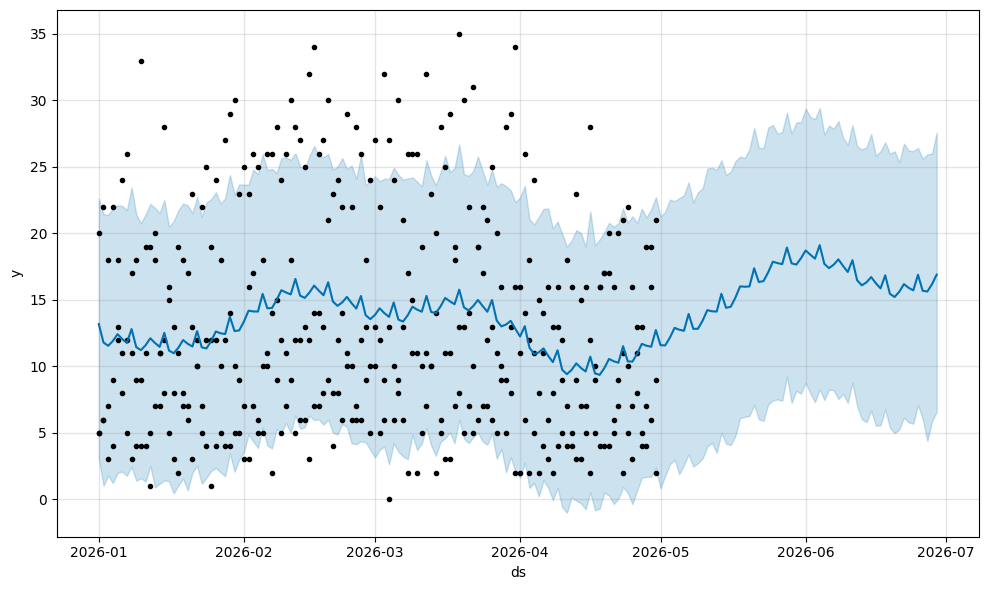

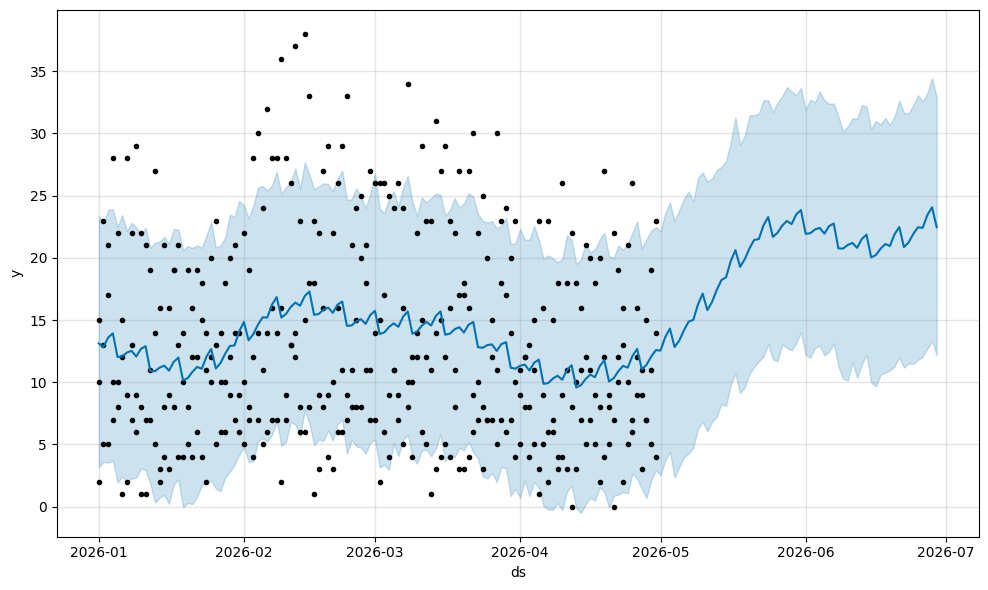

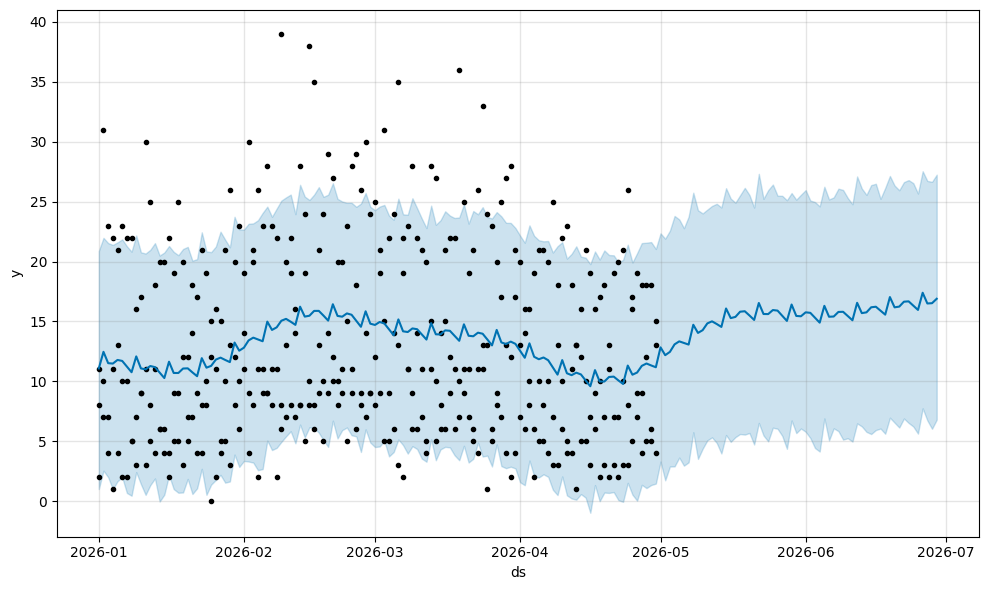

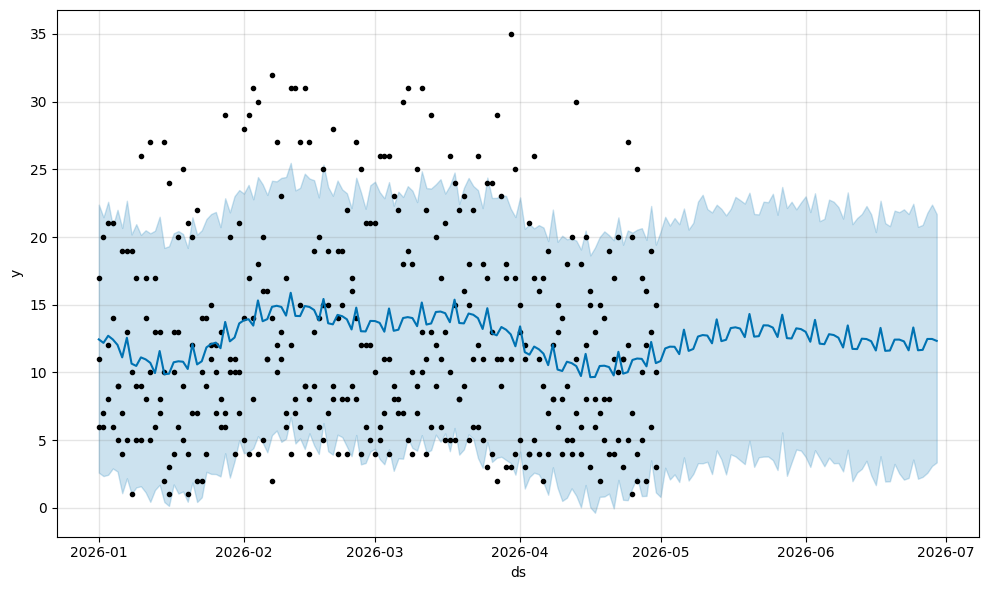

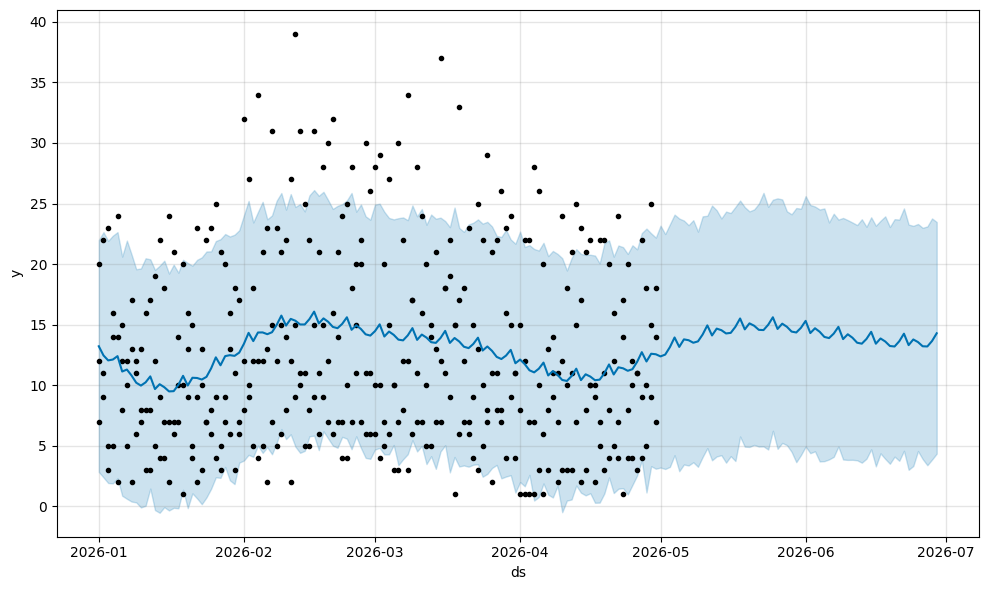

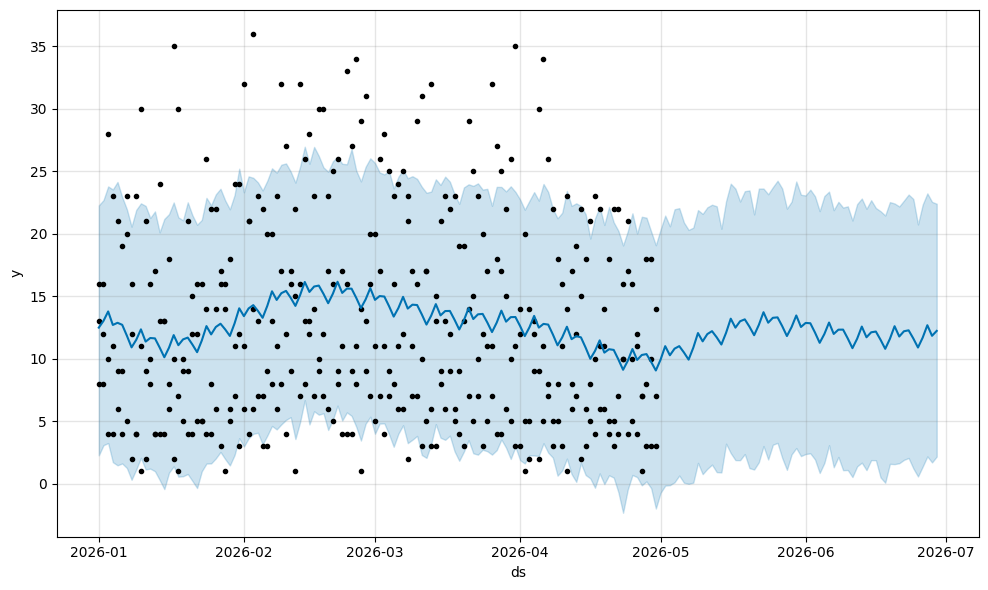

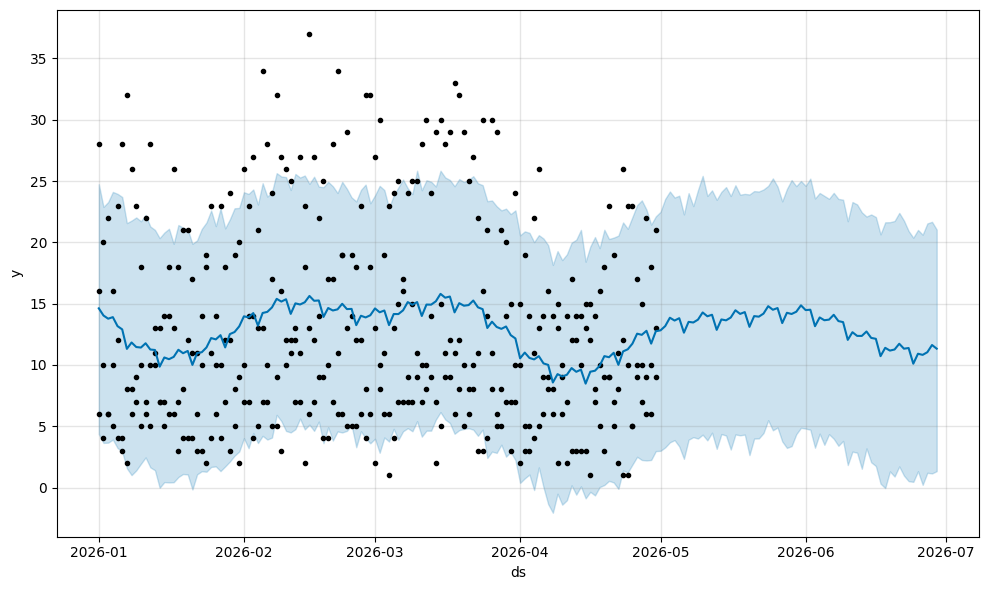

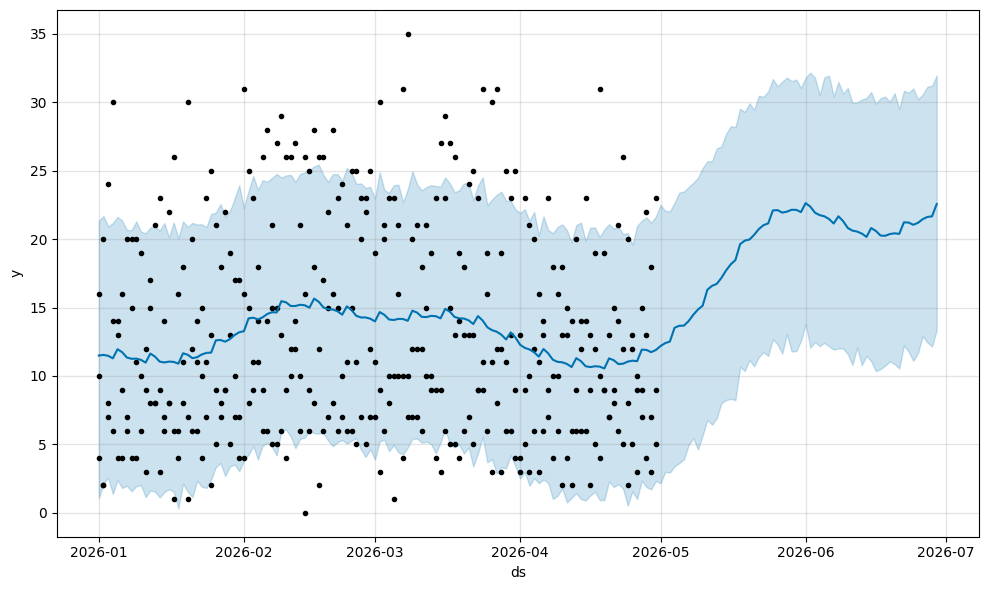

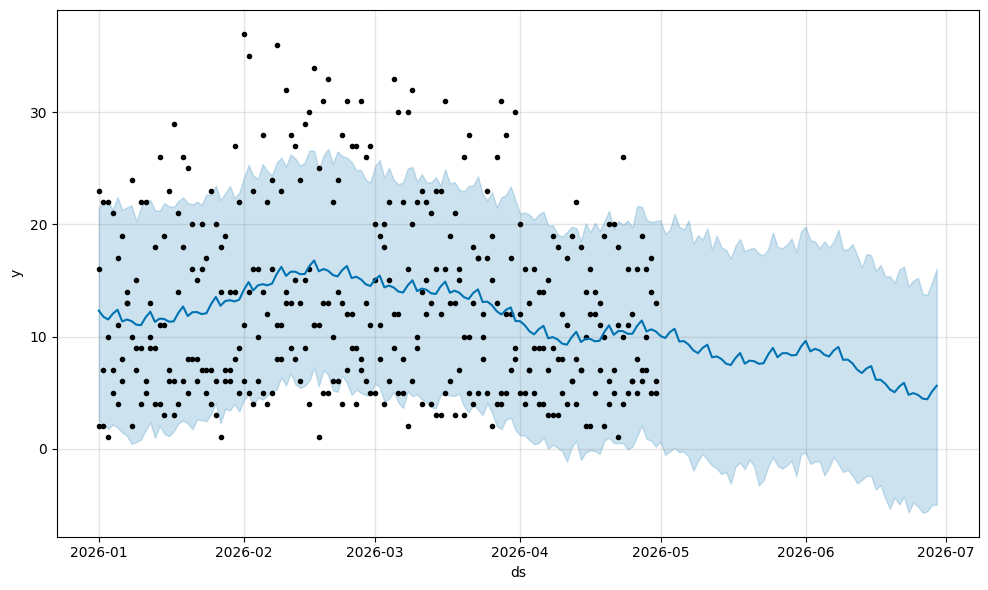

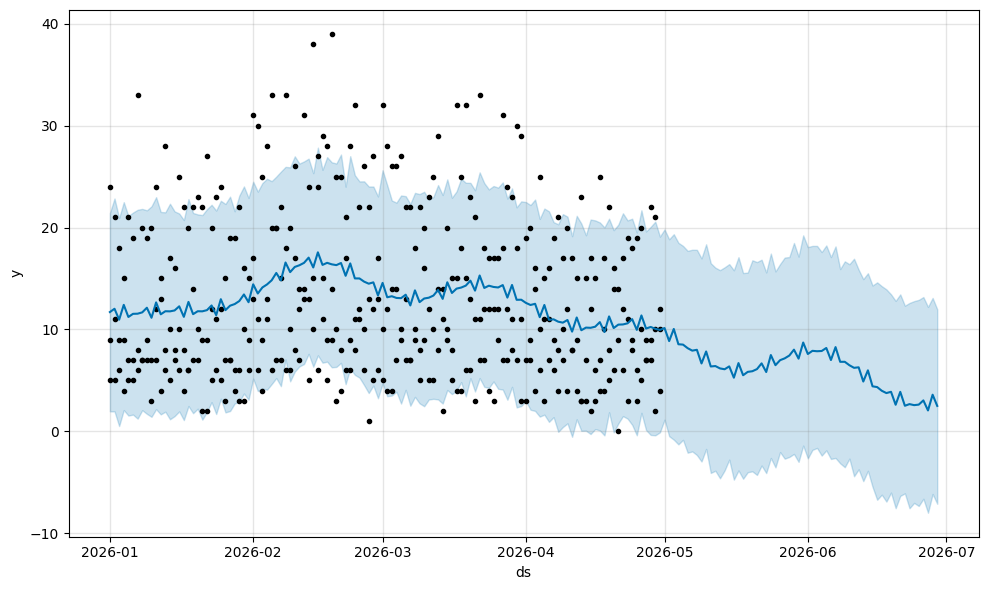

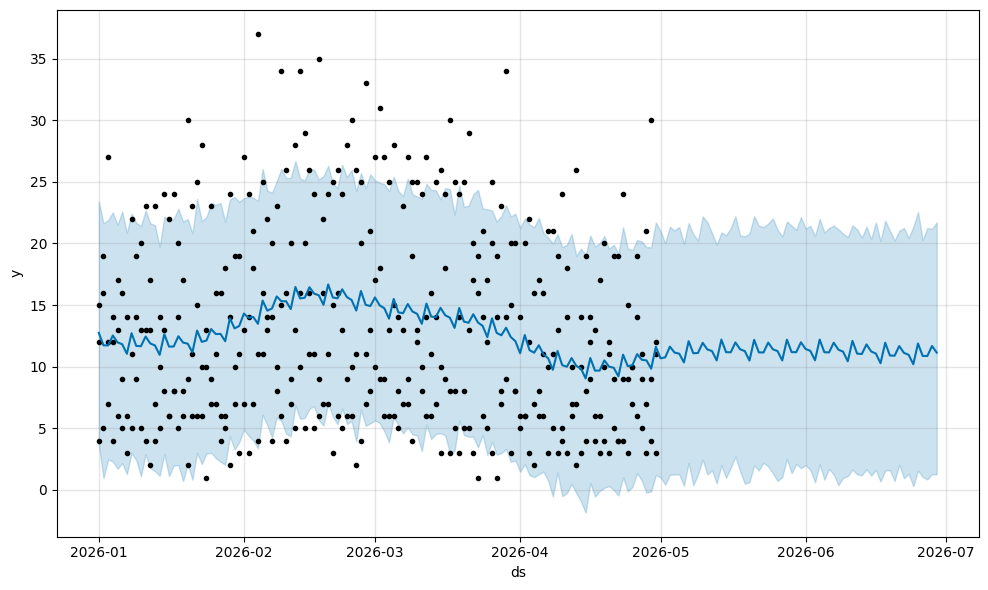

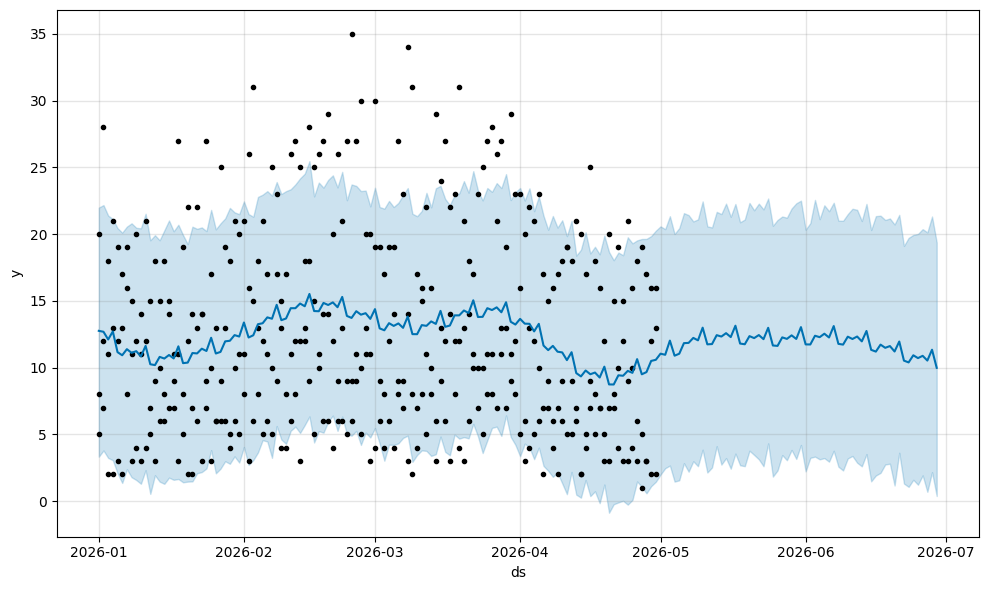

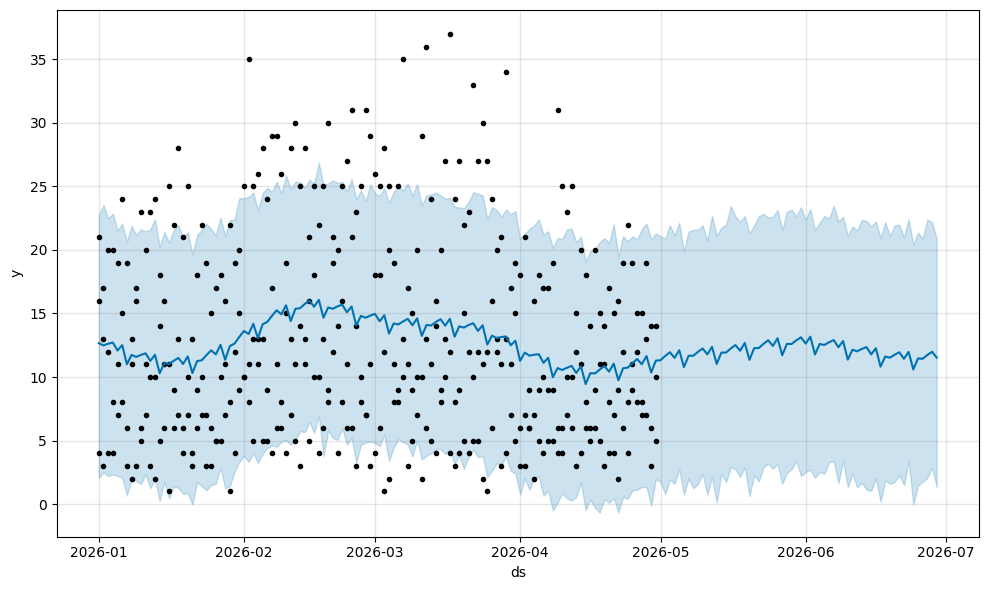

In [22]:
import matplotlib.pyplot as plt
import prophet as prophet 

merge_df["Date"] = pd.to_datetime(merge_df["Date"])

facility_ids = merge_df["Facility_ID"].unique()

all_forecasts = []

for facility in facility_ids: 
    facility_data = merge_df[merge_df["Facility_ID"] == facility]

    prophet_df = facility_data[["Date", "Predicted_Arrivals"]].rename(columns={"Date": "ds", "Predicted_Arrivals": "y"})

    model = prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
    model.fit(prophet_df)

    future = model.make_future_dataframe(periods=60)
    forecast = model.predict(future)

    forecast["Facility_ID"] = facility
    all_forecasts.append(forecast)

    print(model.plot(forecast))




In [32]:
forecast_data = pd.concat(all_forecasts, ignore_index=True)
print(forecast_data)

             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2026-01-01  11.723976   -0.072442   21.762607    11.723976    11.723976   
1    2026-01-02  11.804474    1.998080   22.454882    11.804474    11.804474   
2    2026-01-03  11.884972   -0.704079   21.492553    11.884972    11.884972   
3    2026-01-04  11.965470    1.913776   21.936850    11.965470    11.965470   
4    2026-01-05  12.045968    0.103871   21.122539    12.045968    12.045968   
...         ...        ...         ...         ...          ...          ...   
4675 2026-06-25  10.560121    0.318098   20.134115    10.560096    10.560144   
4676 2026-06-26  10.523456    1.071327   20.627255    10.523431    10.523480   
4677 2026-06-27  10.486792    1.698709   20.674011    10.486766    10.486816   
4678 2026-06-28  10.450127    0.107971   20.107510    10.450101    10.450152   
4679 2026-06-29  10.413463    1.605460   21.260212    10.413436    10.413489   

      additive_terms  additive_terms_lo

In [27]:
import pulp

# Example data: replace with your merged dataset
facilities = ["FAC001", "FAC002", "FAC003"]
beds = {
    "FAC001": 50,
    "FAC002": 30,
    "FAC003": 40
}
demand = {
    "FAC001": 60,
    "FAC002": 25,
    "FAC003": 35
}

# -----------------------------
# 1. Define problem
# -----------------------------
prob = pulp.LpProblem("Bed_Allocation", pulp.LpMinimize)

# -----------------------------
# 2. Decision variables
# -----------------------------
x = pulp.LpVariable.dicts("assign", facilities, lowBound=0)

# -----------------------------
# 3. Objective function
# Minimize total overflow (demand - assigned beds)
# -----------------------------
prob += pulp.lpSum((demand[f] - x[f]) for f in facilities)

# -----------------------------
# 4. Constraints
# -----------------------------
for f in facilities:
    prob += x[f] <= beds[f], f"Capacity_{f}"   # cannot exceed bed capacity
    prob += x[f] <= demand[f], f"Demand_{f}"   # cannot assign more than demand

# -----------------------------
# 5. Solve
# -----------------------------
prob.solve()

# -----------------------------
# 6. Results
# -----------------------------
for f in facilities:
    print(f"{f}: Assigned {x[f].varValue} beds (Capacity {beds[f]}, Demand {demand[f]})")

FAC001: Assigned 50.0 beds (Capacity 50, Demand 60)
FAC002: Assigned 25.0 beds (Capacity 30, Demand 25)
FAC003: Assigned 35.0 beds (Capacity 40, Demand 35)
